<a href="https://colab.research.google.com/github/dgbarnes2022/companion/blob/main/ORF307_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORF307 Homework 1
Due: Friday, Feburary 12, 2021 9:00 pm ET

- The jupyter file is available at [https://github.com/ORF307/companion](https://github.com/ORF307/companion)
- Please export your code with output as `pdf`.
- If there is any additional answers, please combine them as **ONE** pdf file before submitting to the Gradescope.

# Q1 Interpolation of rational functions

A rational function of degree two has the form $$f(t) = \frac{c_1 + c_2 t + c_3 t^2}{1 + d_1 t + d_2 t^2}$$ where $c_1, c_2, c_3, d_1, d_2$ are coefficients.  (‘Rational’ refers to the fact that f is a ratio of polynomials. Another name for f is bi-quadratic.) Consider the interpolation conditions $$f(t_i) = y_i \quad i=1,...,K$$  where $t_i$ and $y_i$ are given numbers. Express the interpolation conditions as a set of linear
equations in the vector of coefficients $\theta = (c_1, c_2, c_3, d_1, d_2)$, as $A \theta = b$. Give $A$ and $b$, and
their dimensions.

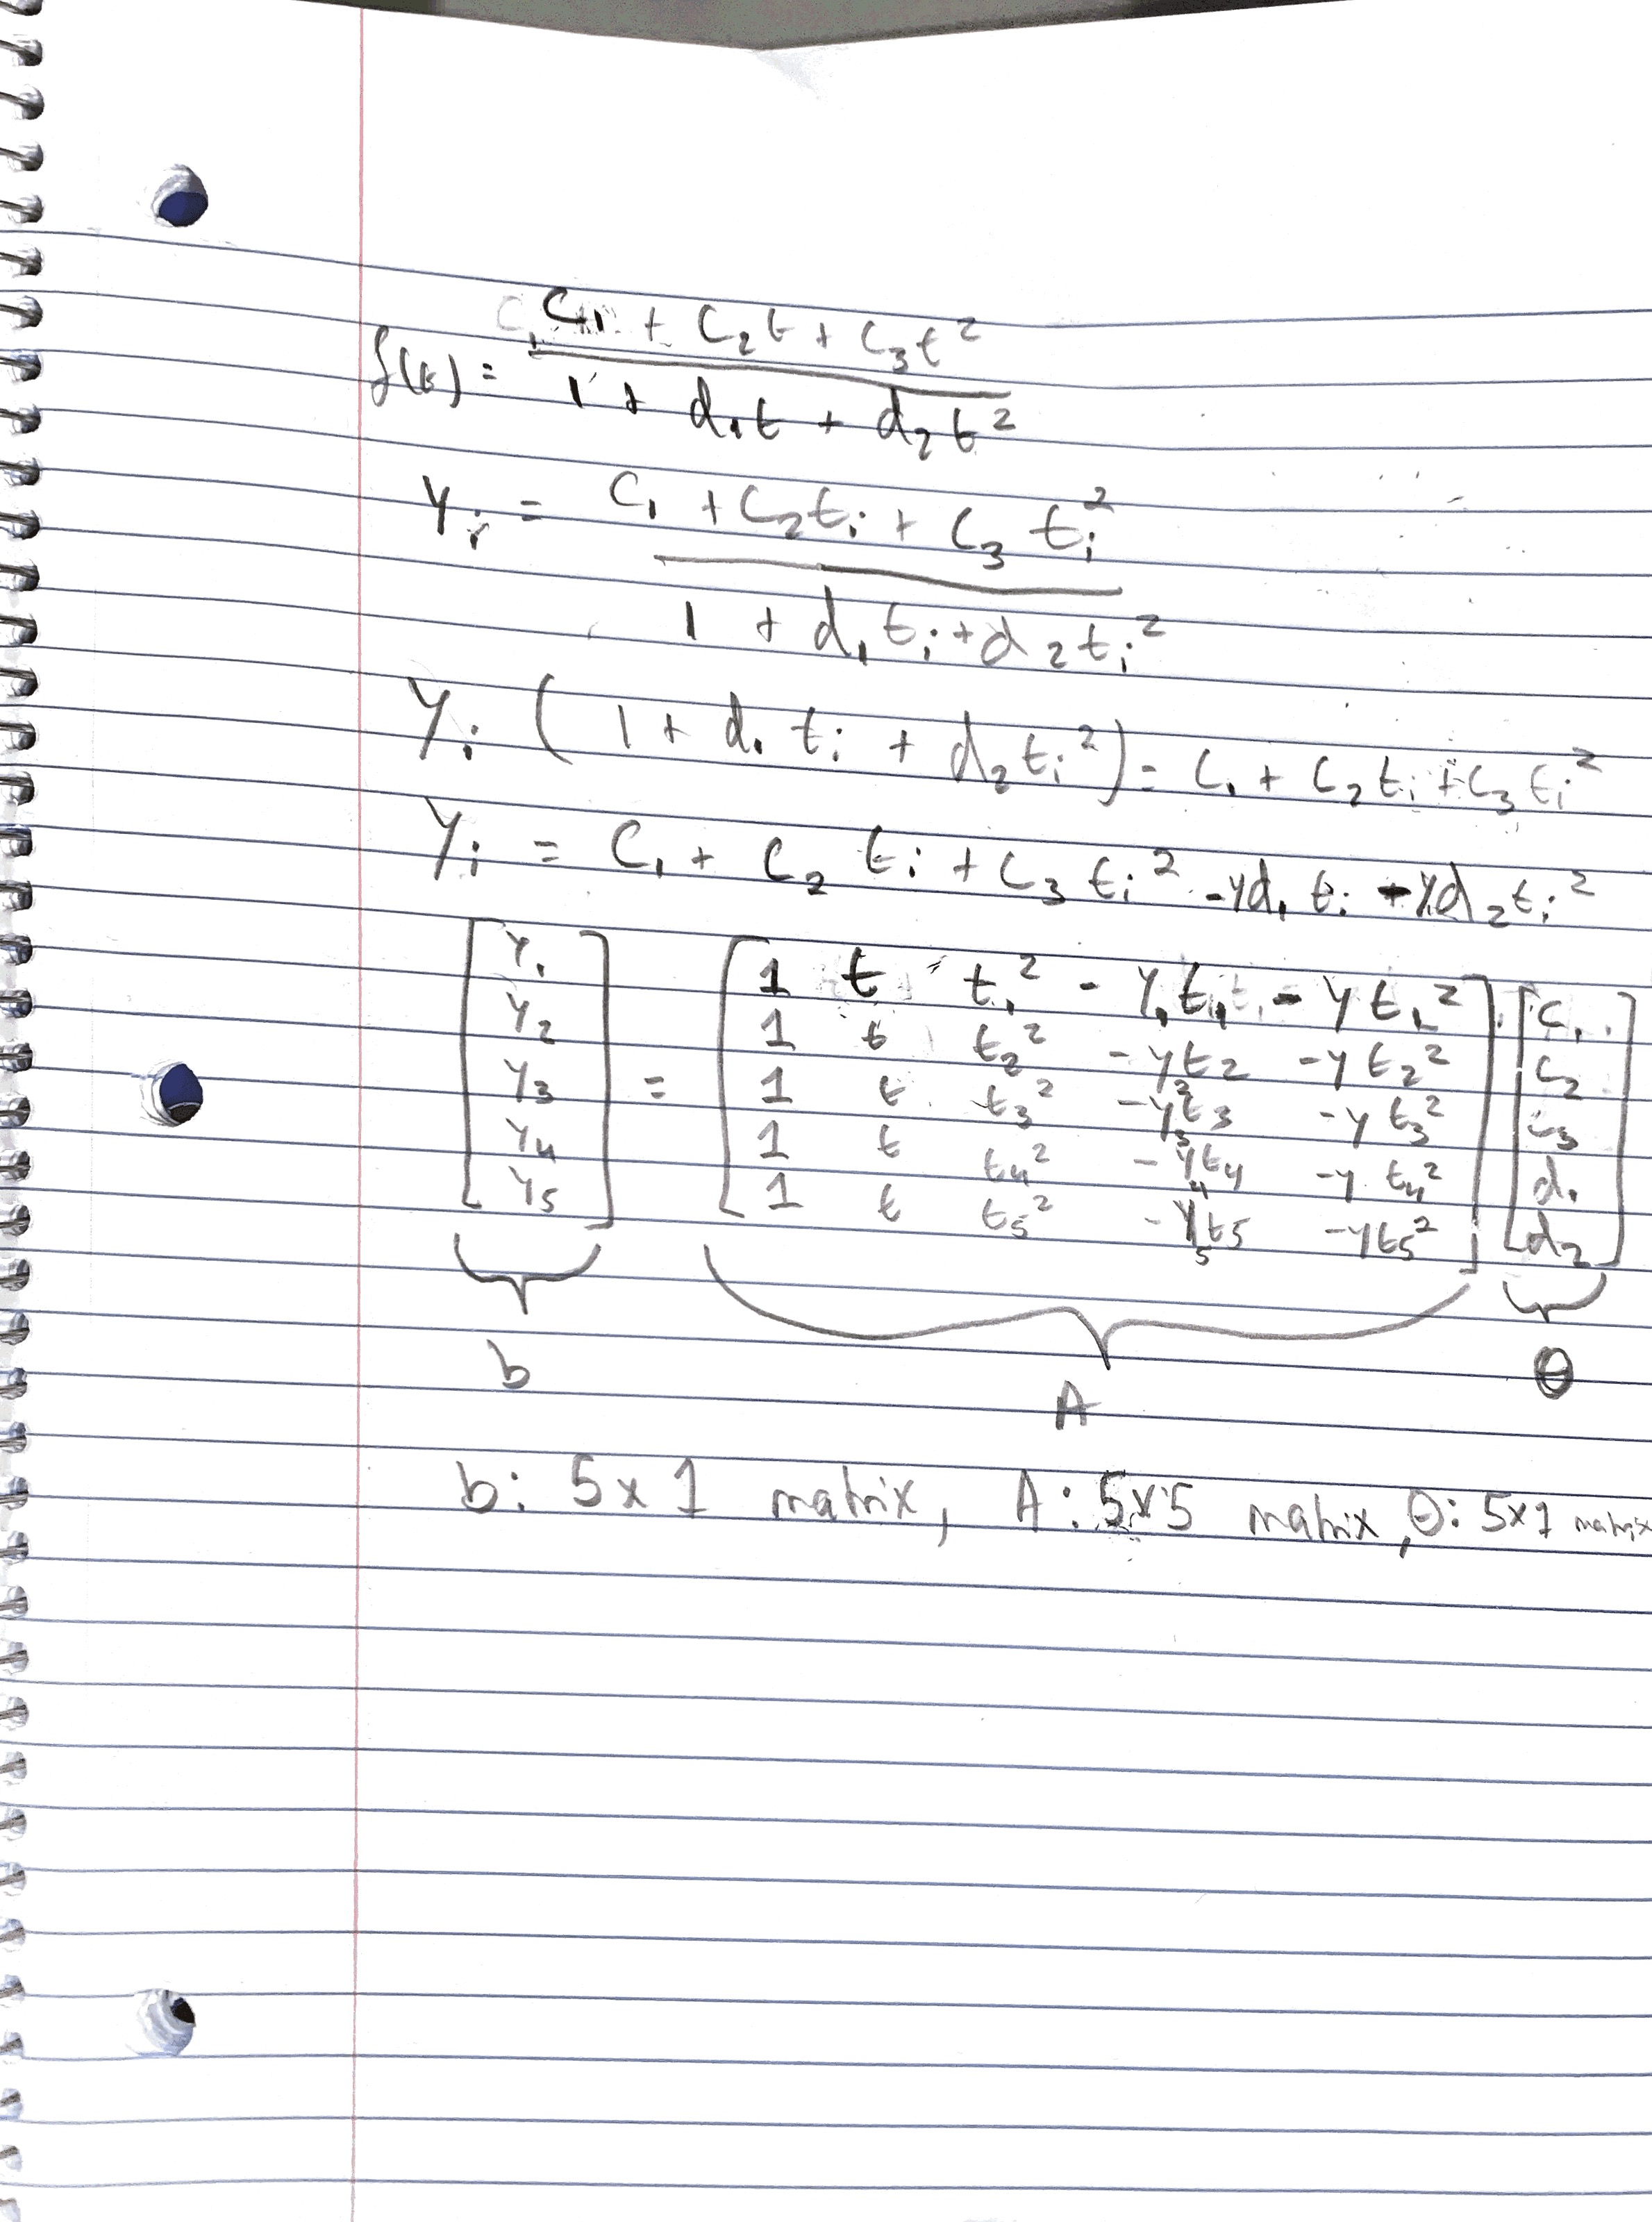

# Q2 Python timing test for linear equations

(a) Determine how long it takes for your computer to solve a system $Ax = b$ of $n=2000$ linear equations in $n=2000$ variables (with invertible coefficient matrix) using the Python's inverse function.  You may use the following code to get you started.  


In [ ]:
import numpy as np
from time import time
N = 2000
A = 1 + np.random.normal(size=(N,N))
b = np.ones(N)

t_start = time()
Ainv = np.linalg.inv(A) # Compute inverse
# some other operation to solve the system ...
x = np.matmul(Ainv, b)
elapsed_time = time() - t_start
print('time to solve (a):', elapsed_time, 'sec')
print(x)

time to solve (a): 0.740546464920044 sec
[-0.01509054 -0.08345767  0.03475075 ...  0.04359025 -0.05303008
  0.04827794]


To solve a system Ax = b of n = 2000 linear equations with 2000 variables, it takes my computer about .75 seconds.

(b) Python is rather clever about how it solves linear systems.  Use the following function to solve the same linear system and determine how long it takes your computer to solve it.  Verify that you get the same solution as from part (a).


In [ ]:
t_start = time()
x = np.linalg.solve(A,b)
elapsed_time = time() - t_start
print('time to solve (b):', elapsed_time, 'sec')
print(x)

time to solve (b): 0.1905970573425293 sec
[-0.01509054 -0.08345767  0.03475075 ...  0.04359025 -0.05303008
  0.04827794]


I get the same solution as in (a) but it takes almost a quarter the time to solve the same set of equationa here as compared to in part (a). That being about 0.19 seconds.

(c) Now we will use $LU$ factorization to solve the linear system.  Use the following lines to first factorize the matrix $A$ as $A = PLU$ where $P$ is a permutation matrix, $L$ is a lower triangular matrix and $U$ is a upper triangular matrix. The idea is that we have $Ax = PLUx = b$.  For convenience we have coded the functions `forward_substitution` and `backward_substitution` for you. A property of any permutation matrix $P$ is that $P^TP = I$.  Use this property to solve the same linear system as in the previous parts and determine how long your computer takes.  Verify that you get the same solution as from parts (a) and (b). 

**Note** Your implementation is not going to be the fastest one, but it will work well. If written in a lower level language such as C or C++, it can sometimes be faster. That's part of the tricks inside numpy's `np.linalg.solve` function.

In [ ]:
def forward_substitution(L, b):
    n = L.shape[0]
    x = np.zeros(n)
    for i in range(n):
        x[i] = (b[i] - L[i,:i] @ x[:i])/L[i, i]
    return x

def backward_substitution(U, b):
    n = U.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (b[i] - U[i,i+1:] @ x[i+1:])/U[i, i]
    return x

In [ ]:
def solve_via_lu(P, L, U, b):
    '''
    Solve linear system Ax = b where
        A = PLU
    '''
    Pdim = P.shape
    Ldim = L.shape
    Udim = U.shape
    print('P dimesntions: ', Pdim)
    print('L dimesntions: ', Ldim)
    print('U dimesntions: ', Udim)

    # Complete ...
    'Inverse of the permutation matrix' 

    Pinv = P.transpose()
    
    print(b)
    n = L.shape[0]
    b = np.matmul(Pinv, b)
    print(b)
    ' Inverse of lower triangular'

    b = forward_substitution(L, b)
    print(b)
    ' Inverse of upper triangular'

    n = L.shape[0]
    # b = np.matmul(Linv, b)
    b = backward_substitution(U, b)
    print(b)

    # Pinvdim = Pinv.shape
    # Linvdim = Linv.shape
    # Uinvdim = U.shape
    # print('Pinv dimesntions: ', Pinvdim)
    # print('Linv dimesntions: ', Linvdim)
    # print('Uinv dimesntions: ', Uinvdim)
    # print(L)
    # print("--------------------------")
    # print(Linv)

    x = b

    return x
    

In [ ]:
from scipy.linalg import lu
from time import time
import numpy as np

t_start = time()
P, L, U = lu(A)  # Factor matrix A as A = PLU
elapsed_time1 = time() - t_start
Pdim = P.shape
Ldim = L.shape
Udim = U.shape
# print('P dimesntions: ', Pdim)
# print('L dimesntions: ', Ldim)
# print('U dimesntions: ', Udim)
x_lu = solve_via_lu(P, L, U, b)  # Solve via LU decomposition
elapsed_time2 = time() - t_start
print('time to solve (c) factoring:', elapsed_time1, 'sec')
print('time to solve (c) using LU decomposing:', elapsed_time2, 'sec')


# ...

P dimesntions:  (2000, 2000)
L dimesntions:  (2000, 2000)
U dimesntions:  (2000, 2000)
[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]
[ 1.          1.14354624  0.7114585  ... -0.28687523 -1.99610587
  0.54556404]
[-0.01509054 -0.08345767  0.03475075 ...  0.04359025 -0.05303008
  0.04827794]
time to solve (c) factoring: 0.2787327766418457 sec
time to solve (c) using LU decomposing: 0.31428003311157227 sec


Using factoring, it takes my computer about 0.28 seconds to solve the equation; and in addition to that, it takes my computer about 0.31 seconds to solve this equation using LU Decomposition.

(d) Can you explain why the times differ by so much between parts (a) and (b)? How does the time in (c) compare? 

The reason why the times between parts (a) and (b) differ so drastically is because in part (a) finding the inverse of matrix A is n^2, then multiplying both sides by the inverse to solve for x would be 2n^3 + 2n^2, pushing the total to about 2n^3 + 3n^2. 

In part (b), using LU factorization cuts the n^3 flops to about 3n^2 (0 flops for finding P transpose, n^2 for multiplying b and P transpose, n^2 for solving the lower triangular matrix, finally, n^2 for solving the upper triangular matrix)

The time in part (c) is very similar to that in part (b) as opposed to that in part (a).

# Q3 State feedback control

Consider a time-invariant linear dynamical system with $n$-vector state $x_t$
and $m$-vector input $u_t$, with dynamics
$$x_{t+1} = A x_t + B u_t,\quad t=1,2,\dots$$
The entries of the state often represent deviations of $n$ quantities from their desired values, so $x_t \approx 0$ is a goal in operation of the system. The entries of the input $u_t$ are deviations from the
standard or nominal values. For example, in an aircraft model, the states might be the deviation
from the desired altitude, climb rate, speed, and angle of attack; the input $u_t$ represents changes
in the control surface angles or engine thrust from their normal values.
In state feedback control, the states are measured and the input is a linear function of the state,
$u_t = K x_t.$
The $m$ x $n$ matrix $K$ is called the state feedback gain matrix. The state feedback gain
matrix is very carefully designed, using several methods. State feedback control is very widely used
in many application areas (including, for example, control of airplanes).

(a) *Open and closed-loop dynamical system.* With $u_t = 0$, the system satisfies $x_{t+1} = A x_t$ for
$t = 1, 2, . . .$, which is called the open-loop dynamics. When $u_t = K x_t$
, the system dynamics
can be expressed as $x_{t+1} = \tilde{A} x_t$
, for $t = 1, 2, . . .$, where the $n\times n$ matrix $\tilde{A}$ is the closed-loop
dynamics matrix. Find an expression for $\tilde{A}$ in terms of $A$, $B$, and $K$.

𝐴̃ = (𝐴 + 𝐵𝐾)

(b) *Aircraft control.* The longitudinal dynamics of a 747 flying at 40000 ft at Mach 0.81 is given
by

$$ A = \begin{bmatrix}
.99 & .03 & -.02 & -.32 \\
.01 & .47 & 4.7 & 0 \\
.02 & -.06 & .4 & 0 \\
.01 & -.04 & .72 & .99 \\
\end{bmatrix}, \quad B = \begin{bmatrix}
.01 & .99 \\
-3.44 & 1.66 \\
-.83 & .44 \\
-.47 & .25 \\
\end{bmatrix},$$

where the sampling time is one second. We will use the state feedback matrix

$$ K = \begin{bmatrix}
-.038 & .021 & .319 & -.27 \\
-.061 & -.004 & -.12 & .007 \\
\end{bmatrix}
$$

(The python matrices `A`, `B`, and `K`  can be found below, so you don’t have
to type them in). Plot the open-loop and closed-loop state trajectories from several nonzero
initial states, such as $x_1 = (1, 0, 0, 0)$, or ones that are randomly generated, from $t = 1$ to
$t = 100$. (In other words, plot $(x_t)_i$ versus $t$, for $i = 1, 2, 3, 4$.) Would you rather be a
passenger in the plane with the state feedback control turned off (i.e., open-loop) or on (i.e.,
closed-loop)?

In [ ]:
A = np.array([[.99, .03, -.02, -.32], [.01, .47, 4.7, 0], [.02, -.06, .4, 0], [.01, -.04, .72, .99]])
B = np.array([[.01, .99], [-3.44, 1.66], [-.83, .44], [-.47, .25]])
K = np.array([[-.038, .021, .319, -.27], [-.061, -.004, -.12, .007]])

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as la
from scipy.linalg import lu_factor
import time

# vars of interest: altitude, climb rate, speed, angle of attack
    # x is the information about the plane now
    # alt is the altitude
    # cr is the climb rate
    # h is the horizon length
    # T is the time length of each increment
    # ang is the angle of attack


def construct_A_x(alt, cr, T, ang):
    x = np.zeros(4)
    x[0] = 40000
    x[1] = 0.81
    x[2] = 1
    x[3] = 0
    return A, x

def plot_trajectories(cr, h, A, x, title):
    # v0 is the initial velocity
    # h is the horizon length
    # T is the time length of each increment

    # setup the initial state
    init_state = np.zeros(4)
    v0 = np.cos(ang)*cr
    init_state[2:] = v0

    # retrieve A, b 
    A, x = construct_A_x(alt, cr, h, ang)

    # simulate the dynamics
    state_trajectory = np.zeros((h, 4))
    state_trajectory[0,:] = init_state
    for i in range(1, h):
        state_trajectory[i,:] = A @ state_trajectory[i-1,:] + x

    # plot the trajectory
    plt.plot(state_trajectory[:,0], state_trajectory[:,1])
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


def find_C_d(A, x, cr, n, T, alt):
    # pT is the desired final position
    # eta is the drag coefficient
    # T is the horizon length
    # h is the time length of each increment
    p0 = np.zeros(2)
    F = np.linalg.matrix_power(A, T)
    C = F[:2,2:]

    # j = (A^(T-1) + ... + A + I)x
    Asum = np.identity(4)
    for i in range(T):
        Asum = Asum + np.linalg.matrix_power(A, i)
    j = Asum @ x
    d = F[:2,:2] @ p0 + j[:2]

    return C, d



In [ ]:
import numpy as np
from numpy.random import default_rng
rng = default_rng()
vals = rng.standard_normal(3)
random1 = vals[0]
random2 = vals[1]
random3 = vals[2]

print(random1, random2, random3)

1.7899192872593368 -1.7489646532644565 -0.12860225261575994


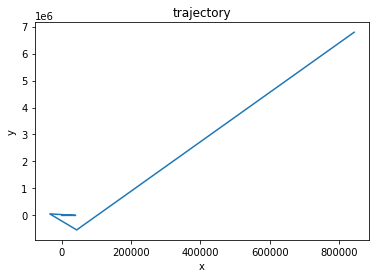

In [ ]:
import numpy as np
from numpy.random import default_rng
rng = default_rng()
vals = rng.standard_normal(3)
random1 = vals[0]
random2 = vals[1]
random3 = vals[2]

# simulate a trajectory
alt = 40000 * random1
cr = .81 * random2
T = .1
ang = 0 + random3
h = 5
A, x = construct_A_x(alt, cr, T, ang)
plot_trajectories(cr, h, A, x, 'trajectory')

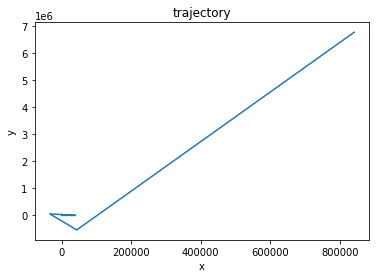

In [ ]:
A1 = (A+np.matmul(B, K))
A = A1
A, x = construct_A_x(alt, cr, T, ang)
plot_trajectories(cr, h, A, x, 'trajectory')

I would much rather be a passenger in a plane with the state feedback dynamics turned on.

The simulation for the flight with the feedback dynamics turned off is horrific. The plane does something of loop while flying in some cases and generally seems much more unstable. This may be fun for a joy ride, but if I wish to get to my destination in one piece, I'll have to pass.

The simulation for the flight with the feedback dynamics turned on is a much more stable and relaxed flight as there are not crazy loops or sharp turns here and there and it looks at though I may arrive at my destination in more or less one piece on that flight.

# Q4
Suppse $x$ and $y$ are Boolean feature vectors, *i.e.*, each entry is either 0 or 1, that encode the presence of symptoms in patients Alice and Bob. Which of the following are true statements?

(a) $x ^T y$ is number of symptoms Alice and Bob have in common

**True**

This is true. Taking the dot prodcuts of thier two symptom vectors would yeild one if and only if the two symptoms aligned. Thus summing them would indicate how many symptoms Alice and Bob share.

(b) $\| x \| ^2$ is the number of symptoms Alice has 

**True**

This is true.

Taking the dot product of Alice's symptom vector with itself will yeild the sum of her symptoms.

(c) $\mathbf{1}^Ty$ is number of symptoms Bob has

**True**

This is true.

Multiplying Bob's symptom vector by a string of ones will simply sum the ones in the location where Bob has a symptom. 

(d) $\|x-y\|^2$ is number of symptoms Alice has but Bob does not

**False**

This is false. Consider x = [1, 0, 1] and y = [0, 1, 0]. 

||x - y||^2 = 3. But, Alice only has 2 symptoms that Bob does not have. This statement is only sometimes true.

(e) $\mathbf{1}^T (x-y)$ is the number of symptoms Alice has but Bob does not

**False**

This is false. This simply shows the difference in the number of symptoms between Alice and Bob.

Consider x = [1, 0, 0] y = [1, 1, 1]

1^T (x - y) = -2. But, Alice and Bob share the one symptom Alice has.

(f) $x^T y = 0$ means that Alice and Bob do not share any symptoms

**True**

This is true. Taking the dot prodcuts of thier two symptom vectors would yeild one if and only if the two symptoms aligned. Thus summing them would indicate how many symptoms Alice and Bob share.

If this dot product is zero, it means that Alice and Bob share no symptoms